In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("sale_of_tour_packages.csv", delimiter=";")
agents = pd.read_csv("travel_agents.csv", delimiter=";")
travels = pd.read_csv("travels.csv", delimiter=";")

In [3]:
# Областные центры
regional_centers = {"Москва", "Санкт-Петербург", "Владимир", "Калуга", "Курск", "Липецк", "Орел", "Рязань", "Смоленск", "Тверь"}

# Количество путешественников в областные центры
travelers = sales.merge(travels, on="ID тура")
travelers = travelers[travelers["Город"].isin(regional_centers)]["Количество проданных путёвок"].sum()
print(f"Путешественники в областные центры: {travelers}")

Путешественники в областные центры: 5161


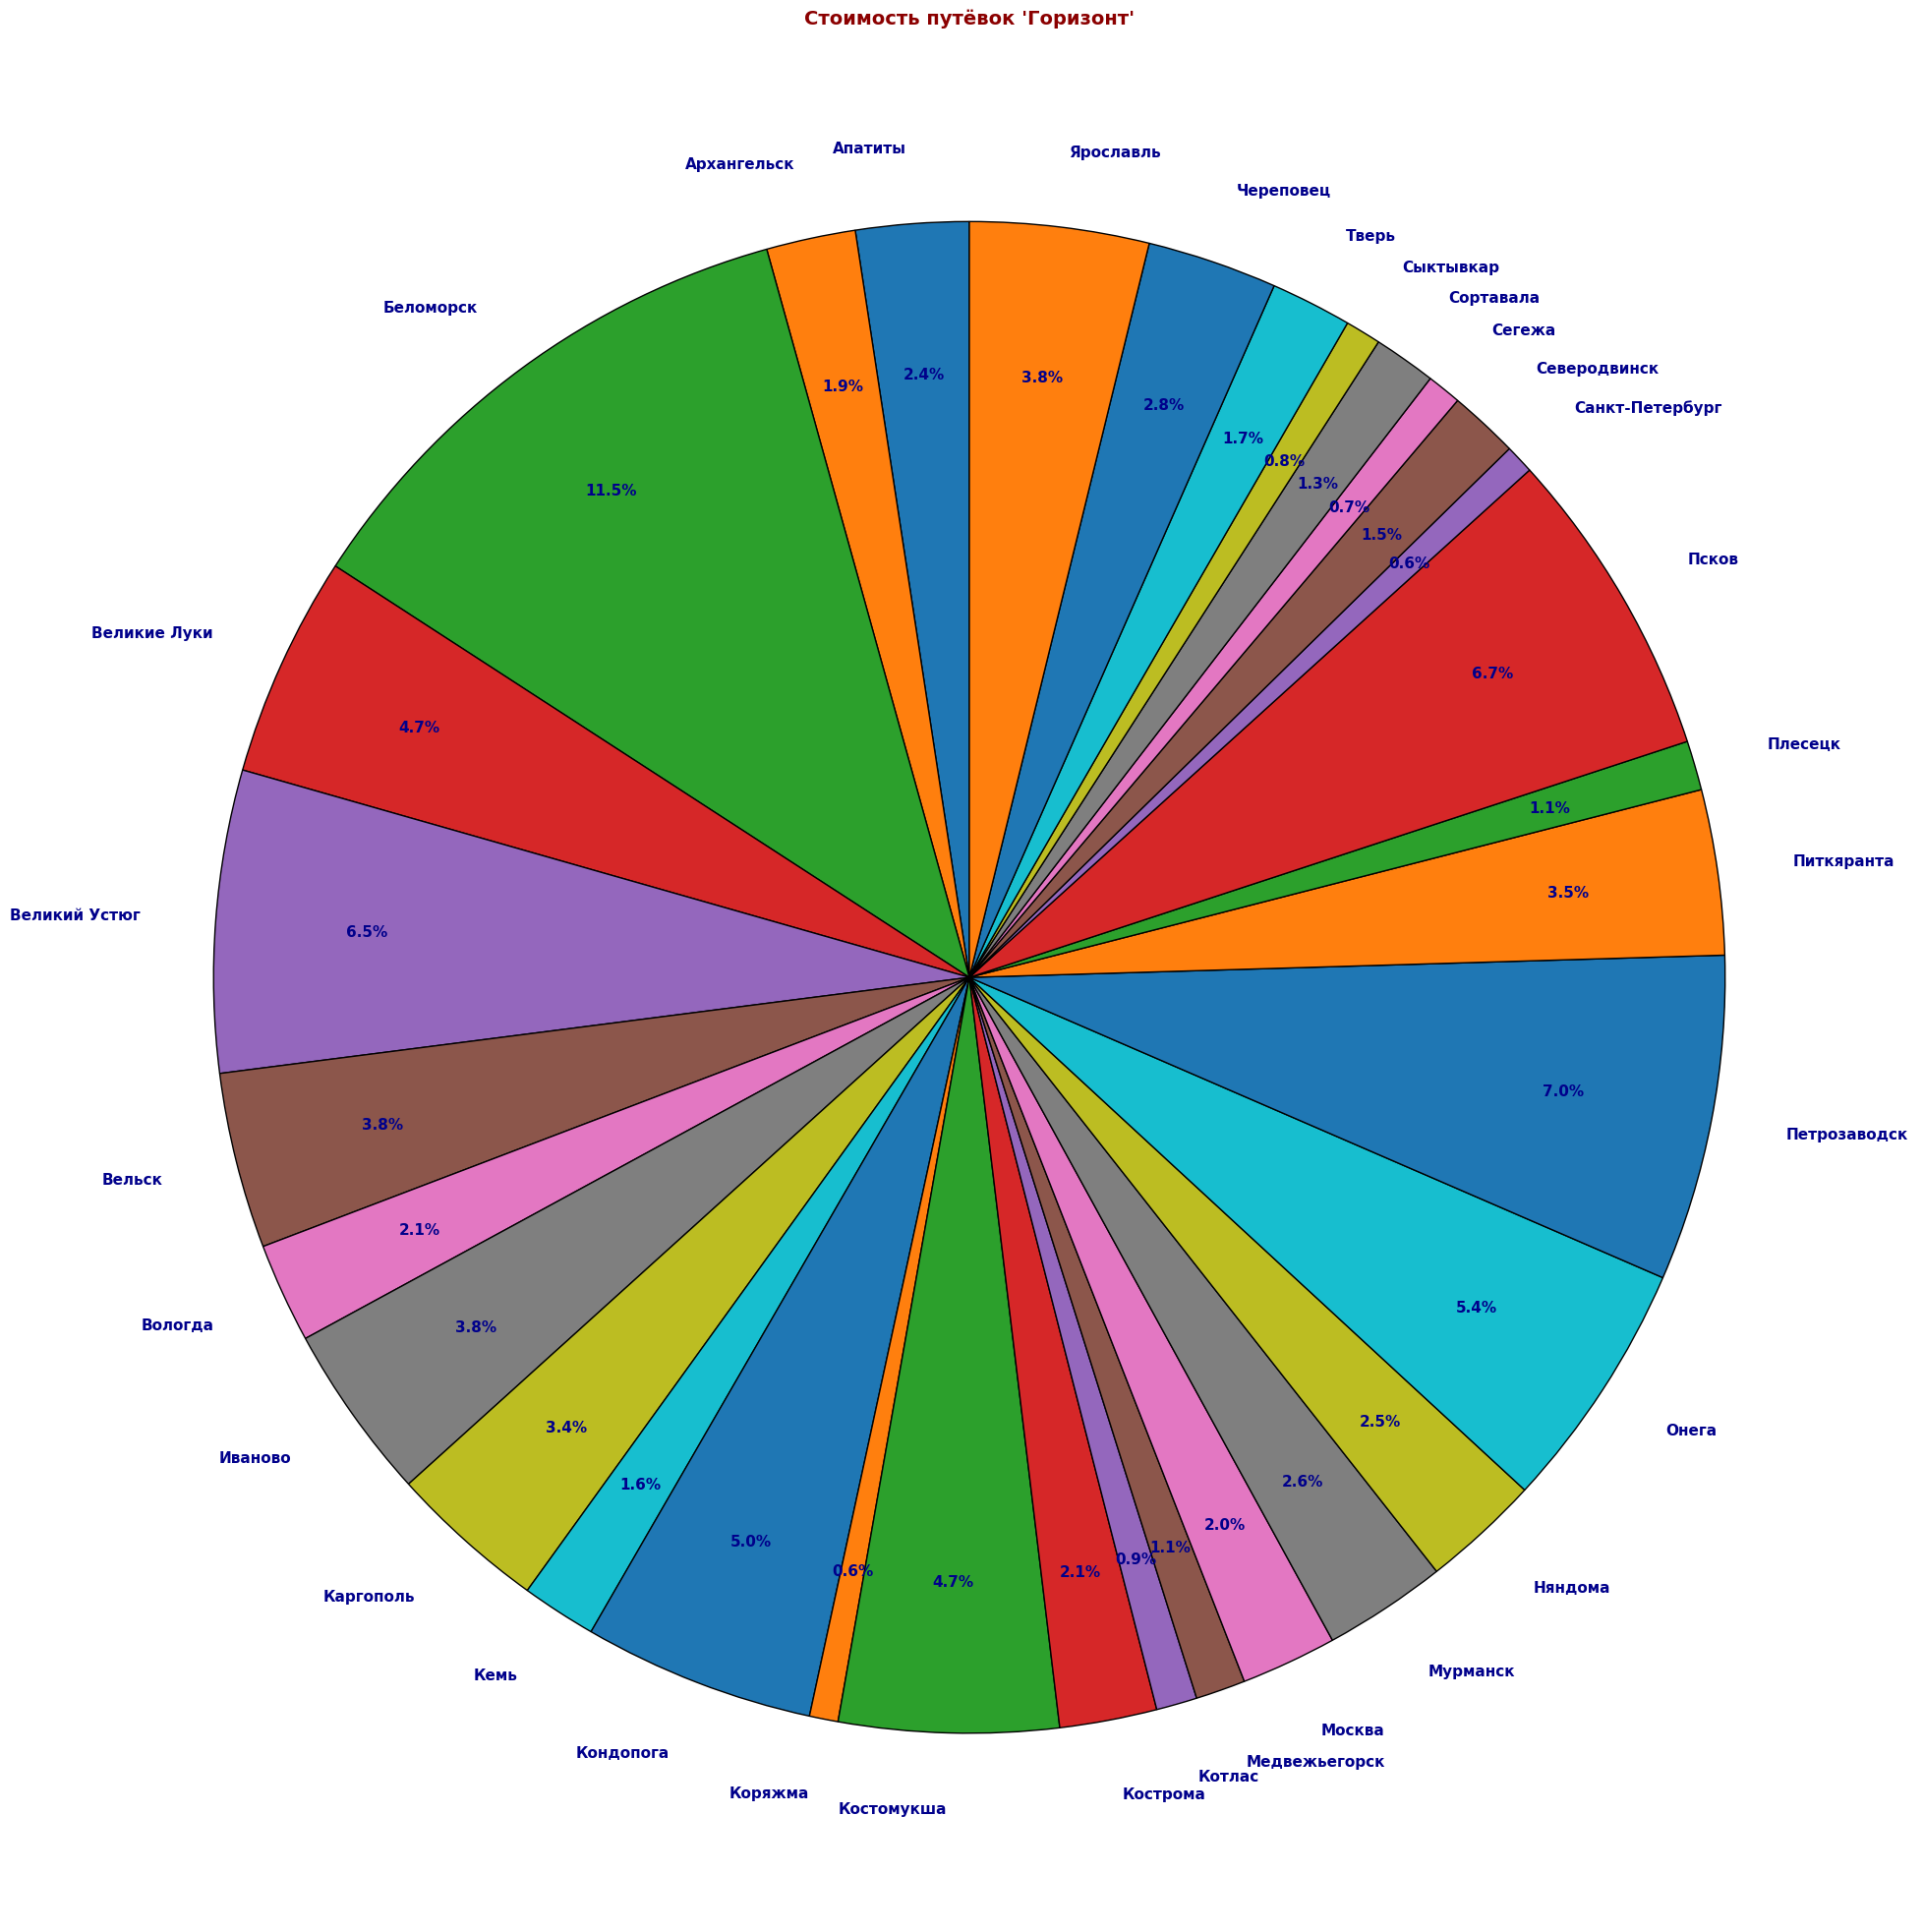

In [4]:
# Круговая диаграмма для "Горизонт"
horizon_sales = sales[sales["ID туроператора"] == agents.loc[agents["Название"] == "Горизонт", "ID туроператора"].values[0]]
horizon_sales = horizon_sales.merge(travels, on="ID тура")
horizon_sales["Общая стоимость"] = horizon_sales["Количество проданных путёвок"] * horizon_sales["Стоимость, на 1 чел"]
city_sales = horizon_sales.groupby("Город")["Общая стоимость"].sum()

plt.figure(figsize=(20, 20))
wedges, texts, autotexts = plt.pie(city_sales, labels=city_sales.index, autopct="%1.1f%%", startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12, 'weight': 'bold'}, pctdistance=0.8)

for text in texts + autotexts:
    text.set_fontsize(11)
    text.set_weight("bold")
    text.set_color("darkblue")

plt.title("Стоимость путёвок 'Горизонт'", fontsize=14, weight='bold', color='darkred')
plt.tight_layout()
plt.show()


/var/folders/ql/hdx33591415byn7mnjpxvz6r0000gn/T/ipykernel_7742/62510182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dream_sales["Дата"] = pd.to_datetime(dream_sales["Дата"], format="%d.%m.%Y")


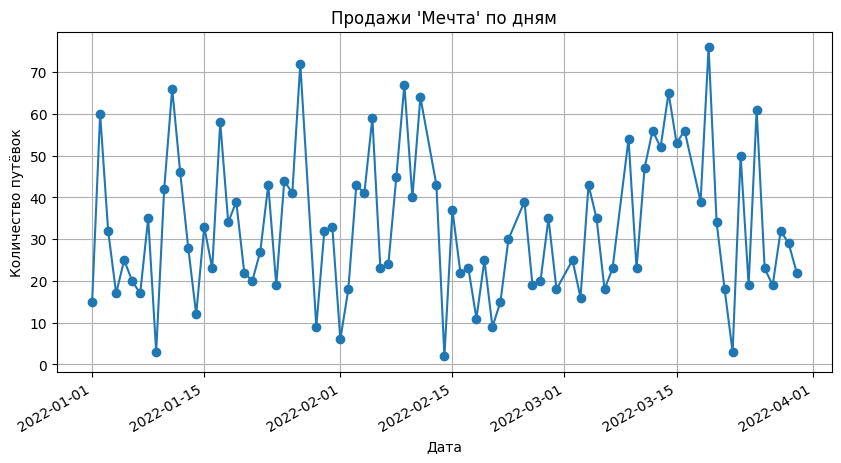

In [5]:

# График продаж "Мечта" по дням
dream_sales = sales[sales["ID туроператора"] == agents.loc[agents["Название"] == "Мечта", "ID туроператора"].values[0]]
dream_sales["Дата"] = pd.to_datetime(dream_sales["Дата"], format="%d.%m.%Y")
daily_sales = dream_sales.groupby("Дата")["Количество проданных путёвок"].sum()

daily_sales.plot(marker="o", figsize=(10, 5), title="Продажи 'Мечта' по дням")
plt.ylabel("Количество путёвок")
plt.grid()
plt.show()